## Noises Comparisons

Loading Libraries:

In [2]:
import sys
sys.path.append(r'C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp\notebooks')
from matplotlib import pyplot as plt
import loaders as load
import numpy as np
import torch

Short Explanation for Algorithms Naming Scheme:
- L2-TRPO: Delay TRPO with Deterministic Belief Module (L2-Loss)
- D-TRPO: Delay TRPO with Stochastic Belief Module (MAF)

Short Explanation for Noises Naming Scheme and Parameters:
- Uniform: Random Action Probability = 0.1
- Triangular: Left, Mode, Right = -2.0, 1.0, 2.0
- LogNormal: Shift, Mu, Sigma = 2.0, 0.0, 1.5
- NewLogNormal: Shift, Mu, Sigma = 1.0, 0.0, 1.0
- SimpleLogNormal: Shift, Mu, Sigma = 1.0, 0.0, 0.5
- Simple2LogNormal: Shift, Mu, Sigma = 1.0, 0.0, 0.3
- Simple3LogNormal: Shift, Mu, Sigma = 1.0, 0.0, 0.2
- Simple4LogNormal: Shift, Mu, Sigma = 1.0, 0.0, 0.1
- Quadratic: Shift, Scale, AB = 0.5, 4.0, 2.0
- NewQuadratic: Shift, Scale, AB = 0.5, 2.0, 2.0
- UShaped: Shift, Scale, AB = 0.5, 4.0, 0.5
- NewUShaped: Shift, Scale, AB = 0.5, 2.0, 0.5
- Beta: A=8, B=2

## Data Loading & General Plot Settings

In [11]:
#L2TRPO and DTRPO without Noises
dtrpo_5_avg, dtrpo_5_std = load.stats_train(method='dtrpo', source='Results', test_type='Delay5', epoch=1000)
l2trpo_5_avg, l2trpo_5_std = load.stats_train(method='l2trpo', source='Results', test_type='Delay5', epoch=500)

# L2 TRPO Noises
l2trpo_uniform_avg, l2trpo_uniform_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-UniformNoise', epoch=500)
l2trpo_triangular_avg, l2trpo_triangular_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-TriangularNoise', epoch=500)
l2trpo_lognormal_avg, l2trpo_lognormal_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-LogNormalNoise', epoch=500)
l2trpo_newlognormal_avg, l2trpo_newlognormal_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-NewLogNormalNoise', epoch=500)
l2trpo_simplelognormal_avg, l2trpo_simplelognormal_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-SimpleLogNormalNoise', epoch=500)
l2trpo_simple2lognormal_avg, l2trpo_simple2lognormal_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-Simple2LogNormalNoise', epoch=500)
l2trpo_simple3lognormal_avg, l2trpo_simple3lognormal_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-Simple3LogNormalNoise', epoch=1000)
l2trpo_simple4lognormal_avg, l2trpo_simple4lognormal_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-Simple4LogNormalNoise', epoch=1000)
l2trpo_quadratic_avg, l2trpo_quadratic_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-QuadraticNoise', epoch=500)
l2trpo_newquadratic_avg, l2trpo_newquadratic_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-NewQuadraticNoise', epoch=500)
l2trpo_ushaped_avg, l2trpo_ushaped_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-UShapedNoise', epoch=500)
l2trpo_newushaped_avg, l2trpo_newushaped_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-NewUShapedNoise', epoch=500)
l2trpo_beta_avg, l2trpo_beta_std = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-BetaNoise', epoch=500)

# DTRPO HiddenDim=8
dtrpo_uniform8_avg, dtrpo_uniform8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-UniformNoise8', epoch=1000)
dtrpo_triangular8_avg, dtrpo_triangular8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-TriangularNoise8', epoch=1000)
dtrpo_newlognormal8_avg, dtrpo_newlognormal8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-NewLogNormalNoise8', epoch=1000)
dtrpo_simple4lognormal8_avg, dtrpo_simple4lognormal8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-Simple4LogNormalNoise', epoch=1000)
dtrpo_newquadratic8_avg, dtrpo_newquadratic8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-NewQuadraticNoise8', epoch=1000)
dtrpo_newushaped8_avg, dtrpo_newushaped8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-NewUShapedNoise8', epoch=1000)
dtrpo_beta8_avg, dtrpo_beta8_std = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-BetaNoise8', epoch=1000)


In [8]:
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='large')

## Deterministic Belief Module: Old Noises

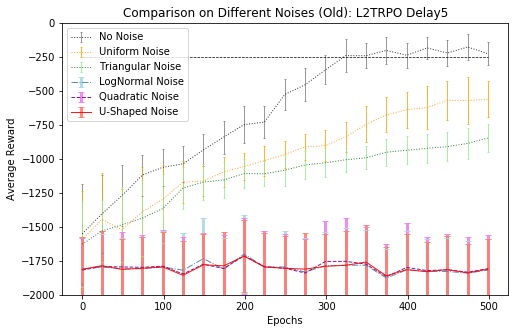

In [14]:
# Plot Range Settings
episode_num = len(l2trpo_uniform_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, l2trpo_5_avg[epochs], yerr=l2trpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, l2trpo_uniform_avg[epochs], yerr=l2trpo_uniform_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, l2trpo_triangular_avg[epochs], yerr=l2trpo_triangular_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, l2trpo_lognormal_avg[epochs], yerr=l2trpo_lognormal_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, l2trpo_quadratic_avg[epochs], yerr=l2trpo_quadratic_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, l2trpo_ushaped_avg[epochs], yerr=l2trpo_ushaped_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different Noises (Old): L2TRPO Delay5')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_L2TRPO_Old.png', dpi=1000)

### Stochastic Belief Module (Hidden Dim=4): Old Noises


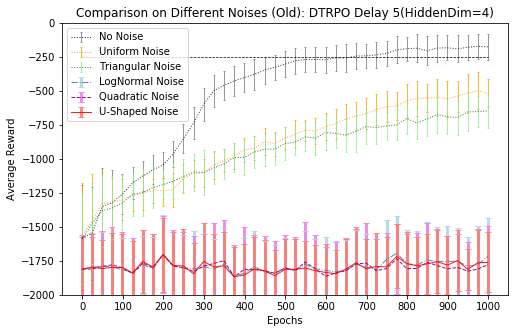

In [15]:
# Plot Range Settings
episode_num = len(dtrpo_uniform4_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, dtrpo_uniform4_avg[epochs], yerr=dtrpo_uniform4_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, dtrpo_triangular4_avg[epochs], yerr=dtrpo_triangular4_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, dtrpo_lognormal4_avg[epochs], yerr=dtrpo_lognormal4_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, dtrpo_quadratic4_avg[epochs], yerr=dtrpo_quadratic4_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, dtrpo_ushaped4_avg[epochs], yerr=dtrpo_ushaped4_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different Noises (Old): DTRPO Delay 5(HiddenDim=4)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO_4_Old.png', dpi=1000)

### Stochastic Belief Module (HiddenDim=8): Old Noises


In [6]:
# Plot Range Settings
episode_num = len(dtrpo_uniform8_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, dtrpo_uniform8_avg[epochs], yerr=dtrpo_uniform8_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, dtrpo_triangular8_avg[epochs], yerr=dtrpo_triangular8_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, dtrpo_lognormal8_avg[epochs], yerr=dtrpo_lognormal8_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, dtrpo_quadratic8_avg[epochs], yerr=dtrpo_quadratic8_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, dtrpo_ushaped8_avg[epochs], yerr=dtrpo_ushaped8_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different Noises (Old): DTRPO (MAF HiddenDim=8)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO_8_Old.png', dpi=1000)

NameError: name 'dtrpo_uniform8_avg' is not defined

### Deterministic Belief Module: New Noises

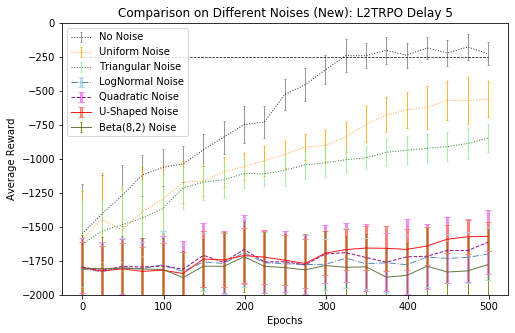

In [17]:
# Plot Range Settings
episode_num = len(l2trpo_uniform_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, l2trpo_5_avg[epochs], yerr=l2trpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, l2trpo_uniform_avg[epochs], yerr=l2trpo_uniform_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform Noise')
ax.errorbar(epochs, l2trpo_triangular_avg[epochs], yerr=l2trpo_triangular_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular Noise')
ax.errorbar(epochs, l2trpo_simple2lognormal_avg[epochs], yerr=l2trpo_simple2lognormal_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=3, capsize=3, label='LogNormal Noise')
ax.errorbar(epochs, l2trpo_newquadratic_avg[epochs], yerr=l2trpo_newquadratic_std[epochs], color='purple', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=3, capsize=3, label='Quadratic Noise')
ax.errorbar(epochs, l2trpo_newushaped_avg[epochs], yerr=l2trpo_newushaped_std[epochs], color='red', ls='solid',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=3, capsize=3, label='U-Shaped Noise')
ax.errorbar(epochs, l2trpo_beta_avg[epochs], yerr=l2trpo_beta_std[epochs], color='darkolivegreen', ls='solid',
            alpha=0.9, linewidth=1, ecolor='olive', elinewidth=1, capsize=1, label='Beta(8,2) Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different Noises (New): L2TRPO Delay 5')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_L2TRPO_New.png', dpi=1000)


### Stochastic Belief Module (HiddenDim=8): New Noises


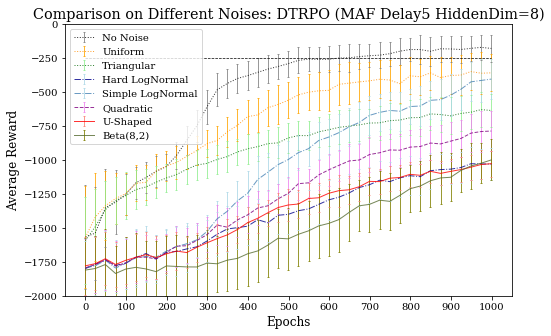

In [12]:
# Plot Range Settings
episode_num = len(dtrpo_uniform8_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_5_avg[epochs], yerr=dtrpo_5_std[epochs], color='black', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='No Noise')
ax.errorbar(epochs, dtrpo_uniform8_avg[epochs], yerr=dtrpo_uniform8_std[epochs], color='darkorange', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='orange', elinewidth=1, capsize=1, label='Uniform')
ax.errorbar(epochs, dtrpo_triangular8_avg[epochs], yerr=dtrpo_triangular8_std[epochs], color='darkgreen', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='Triangular')
ax.errorbar(epochs, dtrpo_newlognormal8_avg[epochs], yerr=dtrpo_newlognormal8_std[epochs], color='darkblue', ls='dashdot',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='Hard LogNormal')
ax.errorbar(epochs, dtrpo_simple4lognormal8_avg[epochs], yerr=dtrpo_simple4lognormal8_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='Simple LogNormal')
ax.errorbar(epochs, dtrpo_newquadratic8_avg[epochs], yerr=dtrpo_newquadratic8_std[epochs], color='purple', ls='dashed',
            alpha=0.8, linewidth=1, ecolor='violet', elinewidth=1, capsize=1, label='Quadratic')
ax.errorbar(epochs, dtrpo_newushaped8_avg[epochs], yerr=dtrpo_newushaped8_std[epochs], color='red', ls='solid',
            alpha=0.8, linewidth=1, ecolor='salmon', elinewidth=1, capsize=1, label='U-Shaped')
ax.errorbar(epochs, dtrpo_beta8_avg[epochs], yerr=dtrpo_beta8_std[epochs], color='darkolivegreen', ls='solid',
            alpha=0.8, linewidth=1, ecolor='olive', elinewidth=1, capsize=1, label='Beta(8,2)')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different Noises: DTRPO (MAF Delay5 HiddenDim=8)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO_8_New.png', dpi=1000)

### Stochastic Belief Module (HiddenDim=8): LogNormal Comparisons


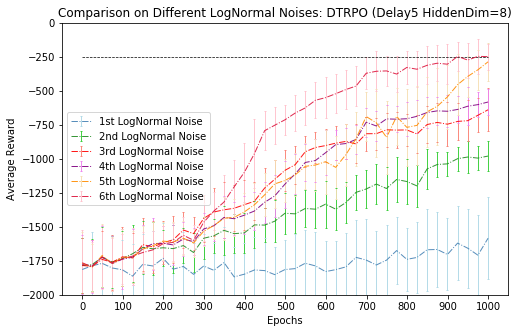

In [5]:
# Plot Range Settings
episode_num = len(dtrpo_newlognormal8_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, dtrpo_lognormal8_avg[epochs], yerr=dtrpo_lognormal8_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='1st LogNormal Noise')
ax.errorbar(epochs, dtrpo_newlognormal8_avg[epochs], yerr=dtrpo_newlognormal8_std[epochs], color='forestgreen', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='limegreen', elinewidth=1, capsize=1, label='2nd LogNormal Noise')
ax.errorbar(epochs, dtrpo_simplelognormal8_avg[epochs], yerr=dtrpo_simplelognormal8_std[epochs], color='red', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=1, capsize=1, label='3rd LogNormal Noise')
ax.errorbar(epochs, dtrpo_simple2lognormal8_avg[epochs], yerr=dtrpo_simple2lognormal8_std[epochs], color='purple', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=1, capsize=1, label='4th LogNormal Noise')
ax.errorbar(epochs, dtrpo_simple3lognormal8_avg[epochs], yerr=dtrpo_simple3lognormal8_std[epochs], color='darkorange', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='wheat', elinewidth=1, capsize=1, label='5th LogNormal Noise')
ax.errorbar(epochs, dtrpo_simple4lognormal8_avg[epochs], yerr=dtrpo_simple4lognormal8_std[epochs], color='crimson', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='pink', elinewidth=1, capsize=1, label='6th LogNormal Noise')

# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 1001, 100))
ax.set_title('Comparison on Different LogNormal Noises: DTRPO (Delay5 HiddenDim=8)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO_8_LogNormalTests.png', dpi=1000)

### Stochastic Belief Module (HiddenDim=8): LogNormal Comparisons


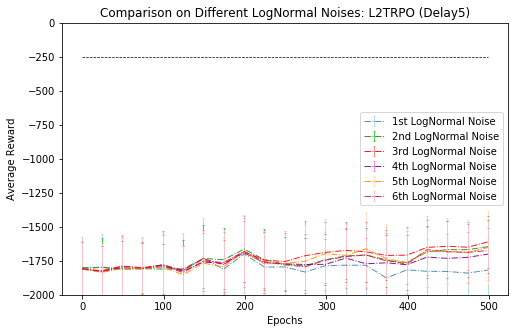

In [4]:
# Plot Range Settings
episode_num = len(l2trpo_newlognormal_avg)
epochs = np.arange(-1, episode_num, 25)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, l2trpo_lognormal_avg[epochs], yerr=l2trpo_lognormal_std[epochs], color='steelblue', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='1st LogNormal Noise')
ax.errorbar(epochs, l2trpo_newlognormal_avg[epochs], yerr=l2trpo_newlognormal_std[epochs], color='forestgreen', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='limegreen', elinewidth=1, capsize=1, label='2nd LogNormal Noise')
ax.errorbar(epochs, l2trpo_simplelognormal_avg[epochs], yerr=l2trpo_simplelognormal_std[epochs], color='red', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='salmon', elinewidth=1, capsize=1, label='3rd LogNormal Noise')
ax.errorbar(epochs, l2trpo_simple2lognormal_avg[epochs], yerr=l2trpo_simple2lognormal_std[epochs], color='purple', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=1, capsize=1, label='4th LogNormal Noise')
ax.errorbar(epochs, l2trpo_simple3lognormal_avg[epochs], yerr=l2trpo_simple3lognormal_std[epochs], color='darkorange', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='wheat', elinewidth=1, capsize=1, label='5th LogNormal Noise')
ax.errorbar(epochs, l2trpo_simple4lognormal_avg[epochs], yerr=l2trpo_simple4lognormal_std[epochs], color='crimson', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='pink', elinewidth=1, capsize=1, label='6th LogNormal Noise')


# Plot Decoration Settings
goal_line = torch.as_tensor([-250] * episode_num, dtype=torch.float32)
ax.plot(epochs, goal_line[epochs], color='black', ls='dashed', linewidth=0.7)
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different LogNormal Noises: L2TRPO (Delay5)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_L2TRPO_LogNormalTests.png', dpi=1000)


In [3]:

epoch = 1000


noises = ['no_noise', 'Beta', 'Triangular', 'Uniform', 'UShaped', 'Quadratic', 'LogNormal']

# L2 TRPO Noises
l2trpo_avg = {}; l2trpo_std = {}
for n in noises:
    if n=='no_noise':
        a, b = load.stats_train(method='l2trpo', source='Results', test_type='Delay5', epoch=epoch)
    else:
        a, b = load.stats_train(method='l2trpo', source='Noises', test_type='Delay5-'+n, epoch=epoch)
    l2trpo_avg[n] = a; l2trpo_std[n] = b
    
# # old TRPO 
# l2trpo_old_avg = {}; l2trpo_old_std = {}
# for n in noises:
#     if n=='no_noise':
#         a, b = load.stats_train(method='l2trpo', source='Results', test_type='Delay5', epoch=epoch)
#     else:
#         a, b = load.stats_train(method='l2trpo', source='OldNoises', test_type='Delay5-'+n, epoch=epoch)
#     l2trpo_old_avg[n] = a; l2trpo_old_std[n] = b
    
# DTRPO HiddenDim=8
dtrpo_avg = {}; dtrpo_std = {}
for n in noises:
    if n=='no_noise':
        a, b = load.stats_train(method='dtrpo', source='Results', test_type='Delay5', epoch=epoch)
    else:
        a, b = load.stats_train(method='dtrpo', source='Noises', test_type='Delay5-'+n, epoch=epoch)
    dtrpo_avg[n] = a; dtrpo_std[n] = b




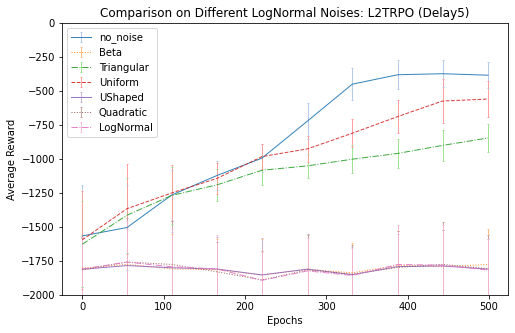

In [51]:
# Plot Range Settings
epochs = np.linspace(0, epoch-1, num=10, dtype=int)

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)



TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
        
LINE_STYLES = ['-',':','-.','--']
# Plot Data
for n_i, n in enumerate(noises):
    ax.errorbar(epochs, l2trpo_old_avg[n][epochs], yerr=l2trpo_old_std[n][epochs], color=TABLE_COLOR[2*n_i], ls=LINE_STYLES[n_i%4],
                alpha=0.9, linewidth=1, ecolor=TABLE_COLOR[2*n_i+1], elinewidth=1, capsize=1, label=n)
    
    
# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different LogNormal Noises: L2TRPO (Delay5)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_L2TRPO.png', dpi=1000)


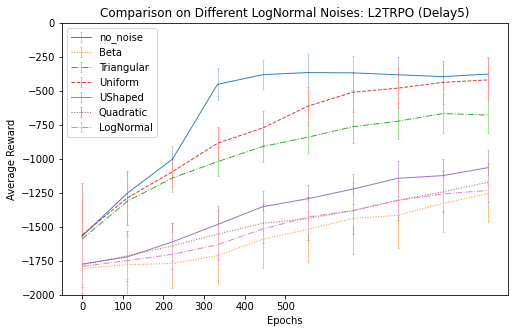

In [62]:
# Plot Range Settings
epochs = np.linspace(0, epoch-1, num=10, dtype=int)

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)



TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
        
LINE_STYLES = ['-',':','-.','--']
# Plot Data
for n_i, n in enumerate(noises):
    ax.errorbar(epochs, l2trpo_avg[n][epochs], yerr=l2trpo_std[n][epochs], color=TABLE_COLOR[2*n_i], ls=LINE_STYLES[n_i%4],
                alpha=0.9, linewidth=1, ecolor=TABLE_COLOR[2*n_i+1], elinewidth=1, capsize=1, label=n)
    
    
# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different LogNormal Noises: L2TRPO (Delay5)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_L2TRPO.png', dpi=1000)


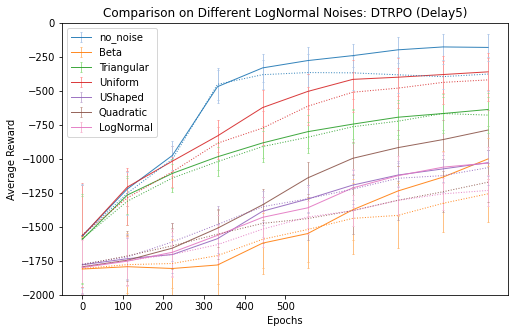

In [10]:
# Plot Range Settings
epochs = np.linspace(0, epoch-1, num=10, dtype=int)

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)



TABLE_COLOR = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(TABLE_COLOR)):
        r, g, b = TABLE_COLOR[i]
        TABLE_COLOR[i] = (r / 255., g / 255., b / 255.)
        
LINE_STYLES = ['-',':','-.','--']
# Plot Data
for n_i, n in enumerate(noises):
    ax.errorbar(epochs, dtrpo_avg[n][epochs], yerr=dtrpo_std[n][epochs], color=TABLE_COLOR[2*n_i], ls=LINE_STYLES[0],
                alpha=0.9, linewidth=1, ecolor=TABLE_COLOR[2*n_i+1], elinewidth=1, capsize=1, label=n)

for n_i, n in enumerate(noises):
    ax.errorbar(epochs, l2trpo_avg[n][epochs], yerr=l2trpo_std[n][epochs], color=TABLE_COLOR[2*n_i], ls=LINE_STYLES[1],
                alpha=0.9, linewidth=1, ecolor=TABLE_COLOR[2*n_i+1], elinewidth=1, capsize=1)
    
    
# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(-2000, 0)
ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Comparison on Different LogNormal Noises: DTRPO (Delay5)')
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
fig.savefig('./plots/Noises_DTRPO.png', dpi=1000)


In [71]:
print('Epoch {}'.format(epoch))
print('L2TRPO')
for n_i, n in enumerate(noises):
    print('{: >20} \t mean {: >20} \t std {}'.format(n, l2trpo_avg[n][-1], l2trpo_std[n][-1]))
print('DTRPO')
for n_i, n in enumerate(noises):
    print('{: >20}\t mean {: >20} \t std {}'.format(n, dtrpo_avg[n][-1], dtrpo_std[n][-1]))

Epoch1000
L2TRPO
            no_noise 	 mean    -375.841024989205 	 std 122.11519317218593
                Beta 	 mean   -1256.858712450238 	 std 206.68326692531144
          Triangular 	 mean     -677.74873156727 	 std 131.561160040969
             Uniform 	 mean   -418.5056321534641 	 std 157.63701371226182
             UShaped 	 mean  -1064.3441311930294 	 std 129.1170671181939
           Quadratic 	 mean  -1171.2387869345505 	 std 144.26240987973117
           LogNormal 	 mean   -1232.022092059209 	 std 114.64502948520587
DTRPO
            no_noise	 mean  -179.78047375621162 	 std 100.24947150388448
                Beta	 mean  -1000.1776052791334 	 std 150.792279228803
          Triangular	 mean    -636.356654886448 	 std 124.50187634578114
             Uniform	 mean  -359.32680988436334 	 std 136.52179734324423
             UShaped	 mean  -1027.8667362652898 	 std 94.75016024427644
           Quadratic	 mean   -787.6760234706032 	 std 145.05734640419462
           LogNormal	 mean 

In [92]:

for n_i, n in enumerate(noises):
    print('{: >20}& \t {:.1f}$\pm${:.1f}&{:.1f}$\\pm${:.1f}\\\\'.format(n, l2trpo_avg[n][-1], l2trpo_std[n][-1], dtrpo_avg[n][-1], dtrpo_std[n][-1]))
    

            no_noise& 	 -375.8$\pm$122.1&-179.8$\pm$100.2\\
                Beta& 	 -1256.9$\pm$206.7&-1000.2$\pm$150.8\\
          Triangular& 	 -677.7$\pm$131.6&-636.4$\pm$124.5\\
             Uniform& 	 -418.5$\pm$157.6&-359.3$\pm$136.5\\
             UShaped& 	 -1064.3$\pm$129.1&-1027.9$\pm$94.8\\
           Quadratic& 	 -1171.2$\pm$144.3&-787.7$\pm$145.1\\
           LogNormal& 	 -1232.0$\pm$114.6&-1030.8$\pm$115.2\\
